In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
# 1. Data Exploration and Understanding

## Dataset Overview

In [4]:
# 1. Load the dataset and display the first 10 rows.

df = pd.read_csv("/content/drive/MyDrive/dataset/WHR-2024-5CS037.csv")
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Identify the number of rows and columns in the dataset.
rows = df.shape[0]
columns = df.shape[1]
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

Number of rows: 143
Number of columns: 9


In [5]:
# 3. List all the columns and their data types.
print(f"columns = {df.columns}\n")

print("All data types: ")
print(df.dtypes)

columns = Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

All data types: 
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


## Basic Statistics

In [ ]:
# 1. Calculate the mean, median, and standard deviation for the Score column.
print(f"The mean is {df['score'].mean()}")
print(f"The median is {df['score'].median()}")
print(f"The standard deviation is{df['score'].std()}")

The mean is 5.52758041958042
The median is 5.785
The standard deviation is1.1707165099442995


In [ ]:
# 2. Identify the country with the highest and lowest happiness scores.
print("The country with highest happiness score: ")
df[['Country name','score']][df.score == df['score'].max()]


The country with highest happiness score: 


,Country name,score
0,Finland,7.741


In [ ]:

print("The country with lowest happiness score: ")
df[['Country name','score']][df.score == df['score'].min()]

The country with lowest happiness score: 


,Country name,score
142,Afghanistan,1.721


## Missing Values

In [6]:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


## Filtering and Sorting:

In [7]:
#1. Filter the dataset to show only the countries with a Score greater than 7.5.
df[['Country name','score']][df.score >7.5]

,Country name,score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525


In [8]:
# 2.For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
df.sort_values(by='Log GDP per capita',ascending=False).head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


## Adding New Columns:

In [9]:
# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
df['Happiness_Category'] = pd.cut(x=df['score'],bins = [0,4,6,float('inf')],labels = ['Low','Medium','High'])
df['Happiness_Category'].sample(n=10)

,Happiness_Category
92,Medium
26,High
112,Medium
140,Low
52,High
13,High
83,Medium
121,Medium
135,Low
133,Low


# 2. Data Visualizations:

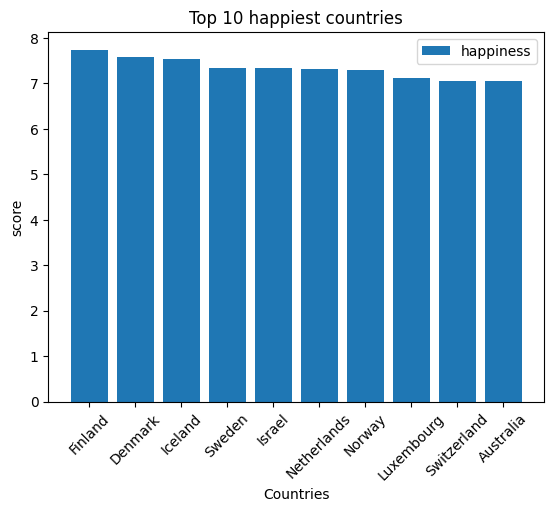

In [10]:
# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest_countries = df.sort_values(by='score',ascending=False).head(10)
top_10_happiest_countries
plt.bar(top_10_happiest_countries['Country name'], top_10_happiest_countries['score'], label = "happiness")
plt.title("Top 10 happiest countries")
plt.xlabel("Countries")
plt.ylabel("score")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

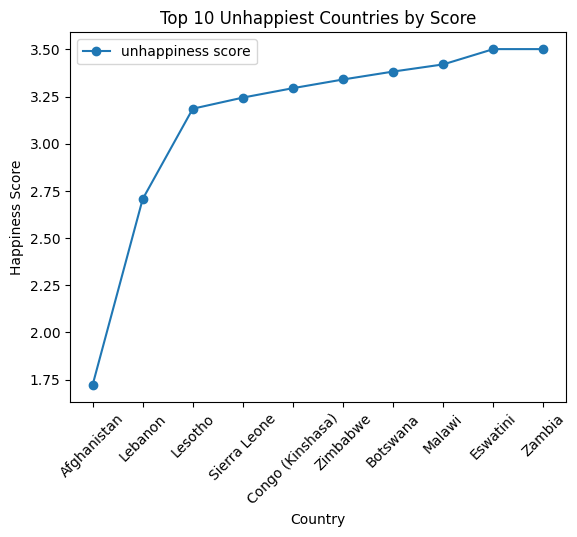

In [ ]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest_countries = df.sort_values(by='score',ascending=True).head(10)
plt.plot(top_10_unhappiest_countries['Country name'],top_10_unhappiest_countries['score'],marker='o',label='unhappiness score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


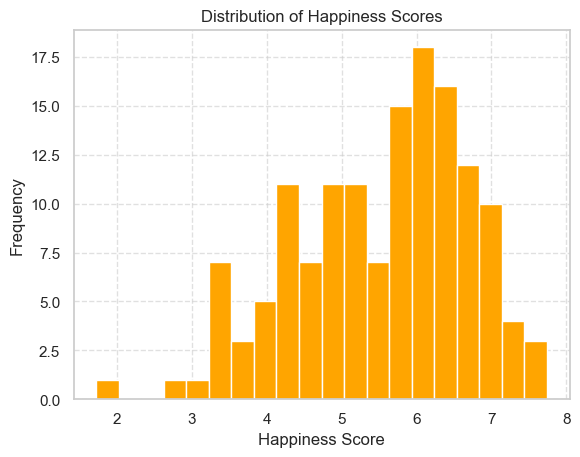

'\nMost people have happiness scores in the moderate to high range (5-7).\nFewer people report extremely low or extremely high happiness scores.\nThis distribution suggests a general tendency toward average-to-high happiness levels in the dataset.\n\n'

In [ ]:
# Plot a histogram for the Score column to show its distribution and also interpret.

# df['score'].plot(kind='hist',title='Distribution of Happiness Scores',color='orange',bins=20)
plt.hist(df['score'], bins=20, color='orange')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

"""
Most people have happiness scores in the moderate to high range (5-7).
Fewer people report extremely low or extremely high happiness scores.
This distribution suggests a general tendency toward average-to-high happiness levels in the dataset.

"""

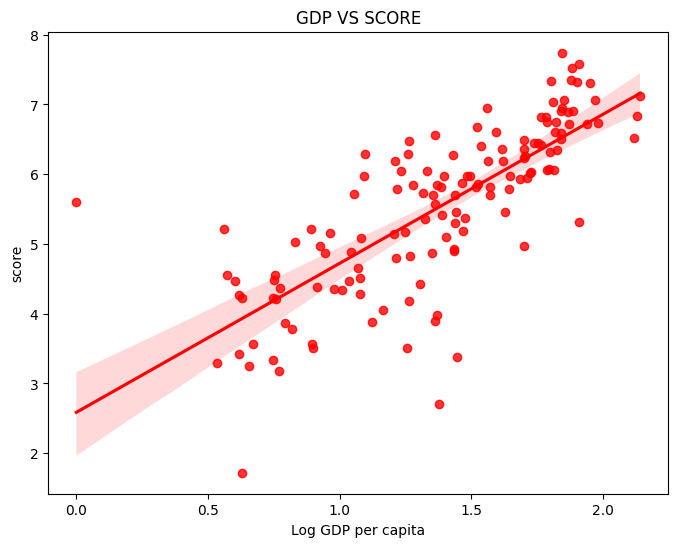

'\nAs the Log GDP per capita increases, the score also tends to increase.\nThis suggests a positive relationship between the two variables:\ncountries with higher Log GDP per capita generally tend to have higher scores.\n'

In [ ]:
# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

plt.figure(figsize=(8,6))
sns.regplot(x='Log GDP per capita', y='score', data=df, color='red')
plt.title('GDP VS SCORE')
plt.show()
"""
As the Log GDP per capita increases, the score also tends to increase.
This suggests a positive relationship between the two variables:
countries with higher Log GDP per capita generally tend to have higher scores.
"""

# 3.2 Problem - 2 - Some Advance Data Exploration Task:

## Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [11]:
# 1. Define the countries in South Asia with a list for example:

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
south_asian_country = df[df['Country name'].isin(south_asian_countries)]

# 3. Save the filtered dataframe as separate CSV files for future use.
south_asian_country.to_csv("/content/drive/MyDrive/dataset/south_asian.csv",index = False)
south_asian_country

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [15]:
asian_df = pd.read_csv("/content/drive/MyDrive/dataset/south_asian.csv")
asian_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [14]:
asian_df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Dystopia + residual,0
Happiness_Category,0


## Task - 2 - Composite Score Ranking:

In [ ]:
# Using the SouthAsia DataFrame, create a new column called Composite Score that combines thefollowing metrics:

asian_df['Composite Score'] = 0.40*asian_df['Log GDP per capita'] + 0.30 * asian_df['Social support'] + 0.30 *asian_df['Healthy life expectancy']
asian_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


In [ ]:
# 2. Rank the South Asian countries based on the Composite Score in descending order.

sorted_comp_score = asian_df.sort_values(by='Composite Score',ascending = False)
sorted_comp_score[['Country name','score','Composite Score']]


,Country name,score,Composite Score
3,Sri Lanka,3.898,1.0739
0,Nepal,5.158,0.8159
2,India,4.054,0.7874
1,Pakistan,4.657,0.7039
4,Bangladesh,3.886,0.6774
5,Afghanistan,1.721,0.3238


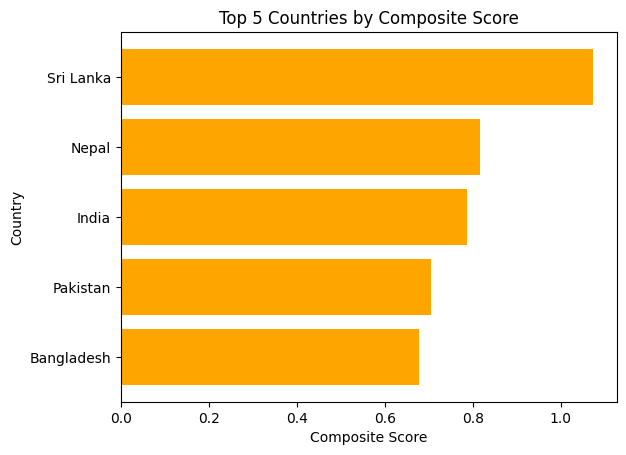

In [ ]:
# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

top_5 = asian_df.sort_values(by="Composite Score", ascending = False).head(5)
plt.barh(top_5['Country name'], top_5['Composite Score'], color='orange')

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 Countries by Composite Score')

# Show the plot
plt.show()

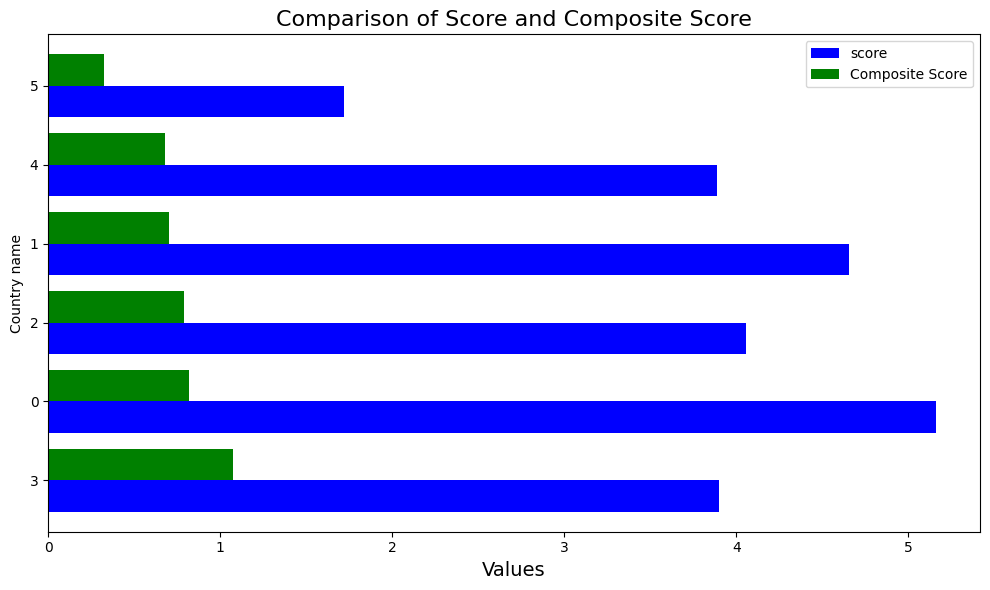

'\nThe rankings based on the Composite Score are not the same as the original Score. For example:\n\nNepal still ranks the highest in both scores.\nIndia and Pakistan have high original scores, but their composite scores are lower.\nBangladesh and Afghanistan have low scores, and their composite scores also remain low.\n\n'

In [ ]:
# Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

# Setting the country name as index because in bar chart instead of name it was showing index
# sorted_comp_score = sorted_comp_score.set_index('Country name')


ax = sorted_comp_score[['score', 'Composite Score']].plot(
    kind='barh', figsize=(10, 6), width=0.8, color=['blue', 'green']
)
plt.title('Comparison of Score and Composite Score', fontsize=16)
plt.ylabel('Country name')
plt.xlabel('Values', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

"""
The rankings based on the Composite Score are not the same as the original Score. For example:

Nepal still ranks the highest in both scores.
India and Pakistan have high original scores, but their composite scores are lower.
Bangladesh and Afghanistan have low scores, and their composite scores also remain low.

"""

In [ ]:
asian_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


## Task - 3 - Outlier Detection:

In [ ]:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

Q1_score = asian_df['score'].quantile(0.25)
Q3_score = asian_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = asian_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = asian_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# 2. Define outliers using the 1.5 × IQR rule.

lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

outliers = asian_df[(asian_df['score'] < lower_bound_score) |
                    (asian_df['score'] > upper_bound_score) |
                    (asian_df['Log GDP per capita'] < lower_bound_gdp) |
                    (asian_df['Log GDP per capita'] > upper_bound_gdp)]

outliers


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,0.3238


'\nOutliers are countries that are very different from the others, either because they have really high GDP per capita or a very high or low score.\nThese outliers can mess with the average numbers for the whole region.\nIn this case, outliers is Argentina which is lower than others.\n\nIf a country is much richer than the others, it makes the region look wealthier than it actually is.\nThe same goes for if a country is much poorer – it can make the region seem worse off than it really is.\n\n\nOutliers can also make the spread of the data look bigger, meaning the countries in the region are very different from each other.\n\n\n'

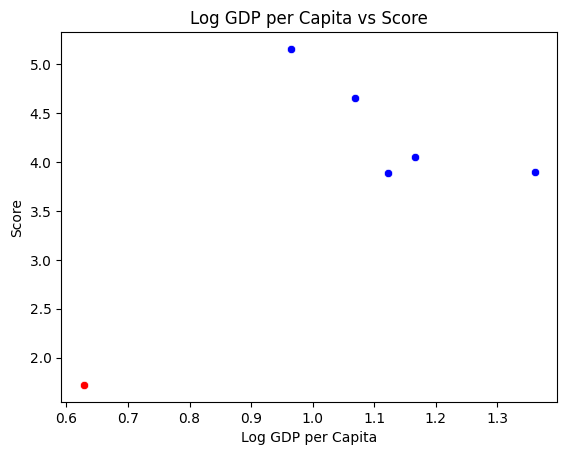

In [ ]:
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

outliers_idx = outliers.index

not_outliers = asian_df[~asian_df.index.isin(outliers.index)]
# print(not_outliers['Country name'])

sns.scatterplot(x=not_outliers['Log GDP per capita'],
                y=not_outliers['score'],
                color='blue')
sns.scatterplot(x=outliers['Log GDP per capita'],
               y=outliers['score'],
               color='red')

plt.title('Log GDP per Capita vs Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')


# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

"""
Outliers are countries that are very different from the others, either because they have really high GDP per capita or a very high or low score.
These outliers can mess with the average numbers for the whole region.
In this case, outliers is Argentina which is lower than others.

If a country is much richer than the others, it makes the region look wealthier than it actually is.
The same goes for if a country is much poorer – it can make the region seem worse off than it really is.


Outliers can also make the spread of the data look bigger, meaning the countries in the region are very different from each other.


"""

## Task - 4 - Exploring Trends Across Metrics:

In [ ]:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

freedom_correlation = asian_df['Freedom to make life choices'].corr(asian_df['score'])
print("Freedom Correlation", freedom_correlation)

generosity_correlation = asian_df['Generosity'].corr(asian_df['score'])
print("Generosity Correlation",generosity_correlation)

Freedom Correlation 0.8005185224163315
Generosity Correlation 0.874512371253192


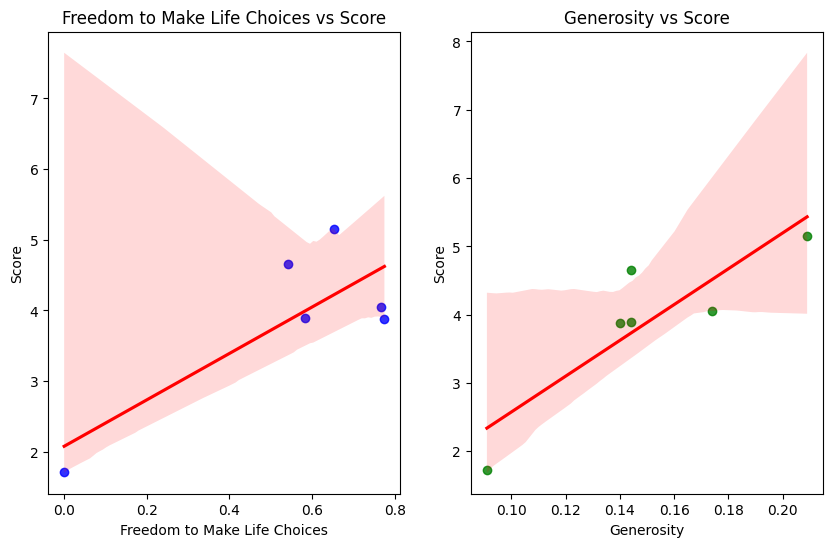

'\nStrongest Relationship: "Freedom to Make Life Choices" has a strong connection with the Score.\nThis means countries where people feel they have more freedom tend to have higher happiness scores.\n\nWeakest Relationship: "Generosity" has a weak connection with the Score.\nThis means generosity doesn\'t impact the happiness score much.\n\nSo, freedom is a better predictor of happiness compared to generosity for South Asian countries.\n'

In [20]:
# Create scatter plots with trendlines for these metrics against the Score.

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x=asian_df['Freedom to make life choices'],
            y=asian_df['score'],
            scatter_kws={"color": "blue"},
            line_kws={"color": "red"})
plt.title("Freedom to Make Life Choices vs Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Score")
plt.subplot(1,2,2)
sns.regplot(x=asian_df['Generosity'],
            y=asian_df['score'],
            scatter_kws={"color": "green"},
            line_kws={"color": "red"})
plt.title("Generosity vs Score")
plt.xlabel("Generosity")
plt.ylabel("Score")
plt.show()

# Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

"""
Strongest Relationship: "Freedom to Make Life Choices" has a strong connection with the Score.
This means countries where people feel they have more freedom tend to have higher happiness scores.

Weakest Relationship: "Generosity" has a weak connection with the Score.
This means generosity doesn't impact the happiness score much.

So, freedom is a better predictor of happiness compared to generosity for South Asian countries.
"""

## Task - 5 - Gap Analysis:

In [ ]:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
asian_df['GDP-Score Gap'] = asian_df['score']-asian_df['Log GDP per capita']
asian_df[['Country name','GDP-Score Gap']]

,Country name,GDP-Score Gap
0,Nepal,4.193
1,Pakistan,3.588
2,India,2.888
3,Sri Lanka,2.537
4,Bangladesh,2.764
5,Afghanistan,1.093


In [ ]:
# 2. Rank the South Asian countries by this gap in both ascending and descending order.

gap_asc = asian_df.sort_values(by='GDP-Score Gap',ascending = True)
gap_asc

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,1.093
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739,2.537
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,2.888
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,3.588
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,4.193


In [ ]:
gap_desc = asian_df.sort_values(by='GDP-Score Gap',ascending = False)
gap_desc

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,2.888
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,2.764
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739,2.537
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,1.093


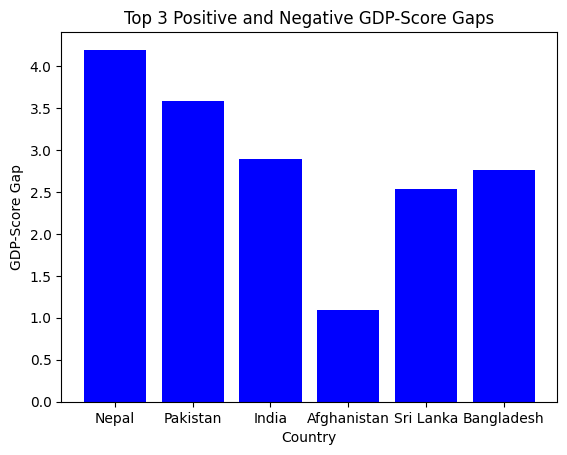

'\nThere are no negative scores.\nCountries like Afghanistan, Sri Lanka, and Bangladesh have smaller gaps.\nThis means their happiness and wealth are a bit closer to each other.\nCountries like Nepal, Pakistan, and India have the biggest gaps.\nThis shows that even though their happiness is high, their wealth (GDP) is much lower.\nIt could be due to poverty, bad economy, or other social problems.\n'

In [ ]:
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

top_pos = gap_desc.head(3)
top_neg = gap_asc.head(3)

top_countries = pd.concat([top_pos, top_neg])

plt.bar(top_countries['Country name'],top_countries['GDP-Score Gap'],color='blue')
plt.title("Top 3 Positive and Negative GDP-Score Gaps")
plt.ylabel("GDP-Score Gap")
plt.xlabel("Country")
plt.show()

# Analyze the reasons behind these gaps and their implications for South Asian countries.

"""
There are no negative scores.
Countries like Afghanistan, Sri Lanka, and Bangladesh have smaller gaps.
This means their happiness and wealth are a bit closer to each other.
Countries like Nepal, Pakistan, and India have the biggest gaps.
This shows that even though their happiness is high, their wealth (GDP) is much lower.
It could be due to poverty, bad economy, or other social problems.
"""

# 3.3 Problem - 3 - Comparative Analysis:

## Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [ ]:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "State of Palestine", "Qatar",
                         "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]
middle_east_df.to_csv("/content/drive/MyDrive/dataset/middle_east.csv",index=False)


In [ ]:
east_df = pd.read_csv("/content/drive/MyDrive/dataset/middle_east.csv")
east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
1,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
2,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
3,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
4,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
6,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
7,State of Palestine,4.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
9,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760


In [ ]:
east_df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,2
Social support,2
Healthy life expectancy,2
Freedom to make life choices,2
Generosity,2
Perceptions of corruption,2
Dystopia + residual,2


In [ ]:
east_df = east_df.loc[(east_df['Country name'] != 'Bahrain') & (east_df['Country name'] != 'State of Palestine')]
east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
1,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
2,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
3,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
5,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
6,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
8,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
9,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
10,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [ ]:
east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
1,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
2,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
3,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
5,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
6,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
8,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
9,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
10,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


###  1. Descriptive Statistics:

In [ ]:
# Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

print("The mean of asian dataframe", asian_df['score'].mean())
print("The Standard deviation of asian dataframe",asian_df['score'].std())
print("The mean of middle east dataframe",east_df['score'].mean())
print("The Standard deviation of east dataframe",east_df['score'].std())

# Which region has higher happiness Scores on average?
"""
Since, the mean (score) of middle east is greater than south asian so, middle east region has higher happiness score.
"""

The mean of asian dataframe 3.895666666666667
The Standard deviation of asian dataframe 1.1770690152521504
The mean of middle east dataframe 5.351333333333333
The Standard deviation of east dataframe 1.648656346847335


'\nSince, the mean (score) of middle east is greater than south asian so, middle east region has higher happiness score.\n'

### 2. Top and Bottom Performers:

In [ ]:
# Identify the top 3 and bottom 3 countries in each region based on the score.

top_3_asian = asian_df.sort_values(by='score',ascending=False).head(3)
top_3_asian

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,2.888


In [ ]:
bottom_3_asian = asian_df.sort_values(by='score',ascending=True).head(3)
bottom_3_asian

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,1.093
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,2.764
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739,2.537


In [ ]:
top_3_east = east_df.sort_values(by='score',ascending=False).head(3)
top_3_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
1,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
2,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741


In [ ]:
bottom_3_east = east_df.sort_values(by='score',ascending=True).head(3)
bottom_3_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
10,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073
9,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
8,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504


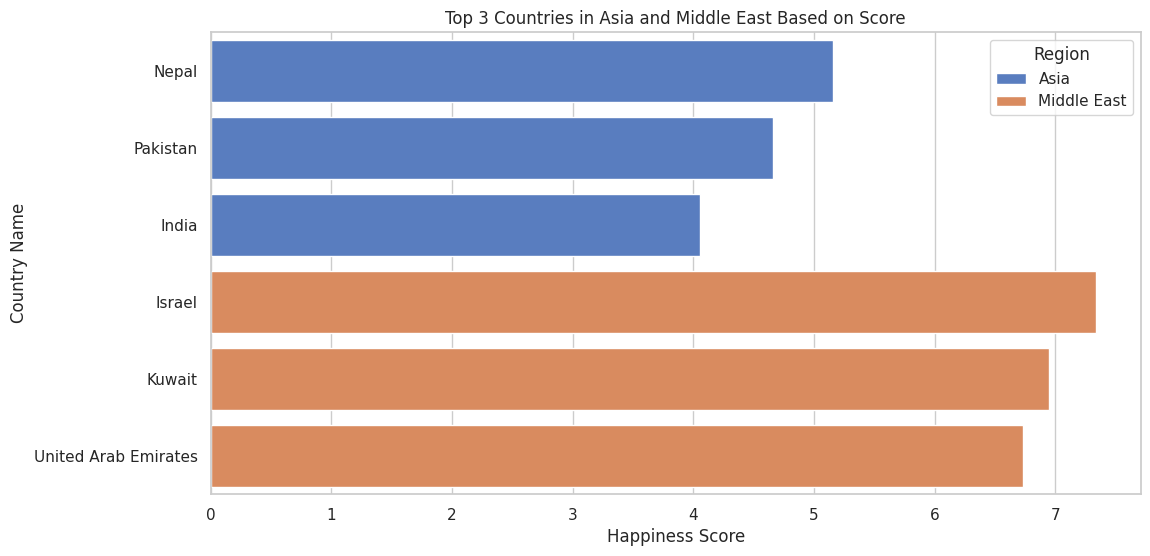

In [ ]:
#  Plot bar charts comparing these charts.

top_3_asian['Region'] = 'Asia'
top_3_east['Region'] = 'Middle East'

top_countries = pd.concat([top_3_asian, top_3_east])

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.title("Top 3 Countries in Asia and Middle East Based on Score")
sns.barplot(data=top_countries, x="score", y="Country name", hue="Region", palette="muted")

plt.xlabel("Happiness Score")
plt.ylabel("Country Name")

plt.show()

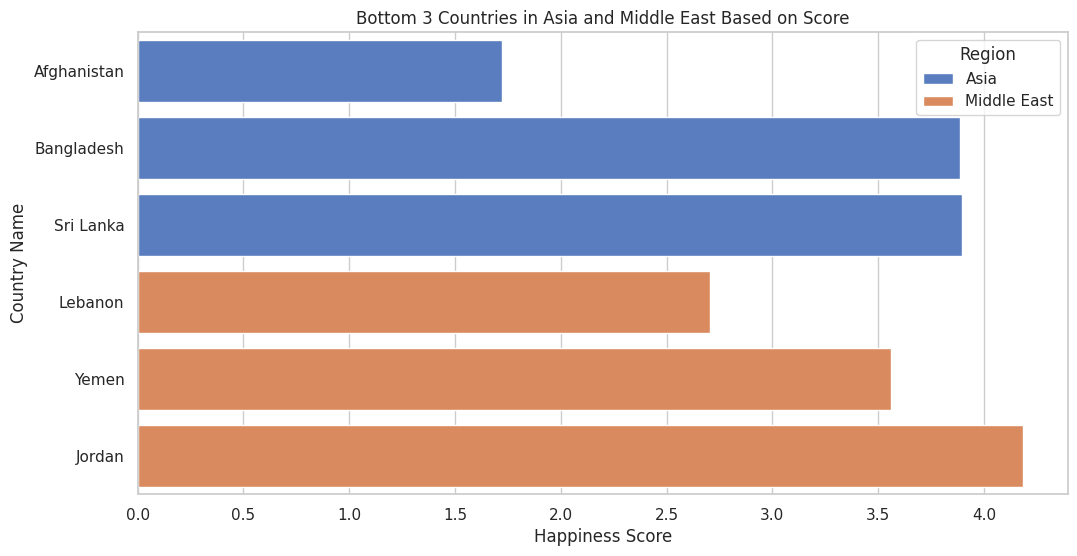

In [ ]:
bottom_3_asian['Region'] = 'Asia'
bottom_3_east['Region'] = 'Middle East'
bottom_countries = pd.concat([bottom_3_asian, bottom_3_east])

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.title("Bottom 3 Countries in Asia and Middle East Based on Score")
sns.barplot(data=bottom_countries, x="score", y="Country name", hue="Region", palette="muted")

plt.xlabel("Happiness Score")
plt.ylabel("Country Name")

plt.show()

### 3. Metric Comparisons:

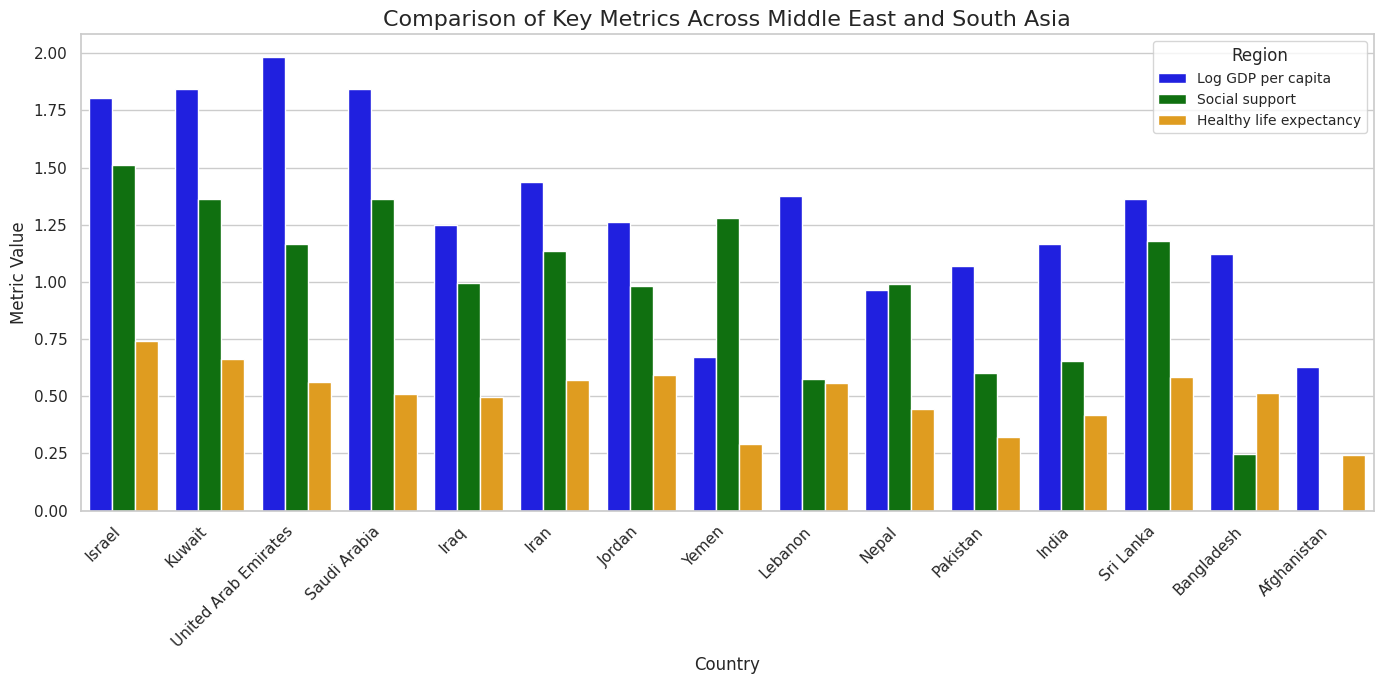

'\nLog GDP per Capita shows the largest gap, followed by Social Support, and then Healthy Life Expectancy.\nThese differences underline the socioeconomic and healthcare infrastructure variations between the two regions.\n'

In [ ]:
# Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

east_df = east_df.copy()
east_df.loc[:, 'Region'] = 'Middle East'

asian_df = asian_df.copy()
asian_df.loc[:, 'Region'] = 'South Asia'

# Combine the two DataFrames
combined_df = pd.concat([east_df, asian_df])

# Select relevant metrics
metrics_df = combined_df[['Country name', 'Region', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']]

# Melt DataFrame to long format
metrics_melted = metrics_df.melt(
    id_vars=['Country name', 'Region'],
    value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'],
    var_name='Metric',
    value_name='Value'
)

# Plot grouped bar chart with adjusted gaps
plt.figure(figsize=(14, 7))
sns.barplot(
    data=metrics_melted,
    x='Country name',
    y='Value',
   hue='Metric',
    palette=['blue', 'green','orange']
)

plt.title('Comparison of Key Metrics Across Middle East and South Asia', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', fontsize=10)

plt.tight_layout()
plt.show()

# Which metrics show the largest disparity between the two regions?

"""
Log GDP per Capita shows the largest gap, followed by Social Support, and then Healthy Life Expectancy.
These differences underline the socioeconomic and healthcare infrastructure variations between the two regions.
"""

### 4. Happiness Disparity

In [ ]:
# Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

range_asian = asian_df['score'].max() - asian_df['score'].min()
range_east = east_df['score'].max() - east_df['score'].min()

cv_asian = (asian_df['score'].std() / asian_df['score'].mean()) * 100
cv_east = (east_df['score'].std() / east_df['score'].mean()) * 100

print(f"Asian Region - Range: {range_asian}, CV: {cv_asian}")
print(f"East Region - Range: {range_east}, CV: {cv_east}")

# Which region has greater variability in happiness?
"""The East Region shows greater variability in happiness, both in terms of a larger range and
a slightly higher coefficient of variation."""

Asian Region - Range: 3.4370000000000003, CV: 30.21482883337427
East Region - Range: 4.634, CV: 30.808328395054225


'The East Region shows greater variability in happiness, both in terms of a larger range and\na slightly higher coefficient of variation.'

### 5. Correlation Analysis:

In [ ]:
# Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

correlation_by_region = combined_df.groupby('Region')[['score', 'Freedom to make life choices', 'Generosity']].corr()
correlation_by_region

score  \
Region                                               
Middle East score                         1.000000   
            Freedom to make life choices  0.863220   
            Generosity                    0.627524   
South Asia  score                         1.000000   
            Freedom to make life choices  0.800519   
            Generosity                    0.874512   

                                          Freedom to make life choices  \
Region                                                                   
Middle East score                                             0.863220   
            Freedom to make life choices                      1.000000   
            Generosity                                        0.388854   
South Asia  score                                             0.800519   
            Freedom to make life choices                      1.000000   
            Generosity                                        0.733396   

                                          Generosity  
Region                                                
Middle East score                           0.627524  
            Freedom to make life choices    0.388854  
            Generosity                      1.000000  
South Asia  score                           0.874512  
            Freedom to make life choices    0.733396  
            Generosity                      1.000000

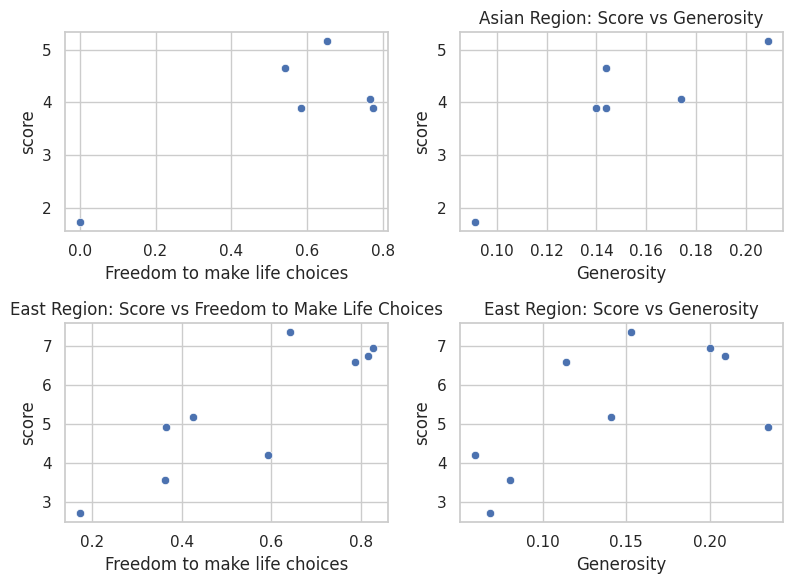

In [ ]:
# Create scatter plots to visualize and interpret the relationships.

asian_corr_freedom = asian_df[['score', 'Freedom to make life choices']].corr()
asian_corr_generosity = asian_df[['score', 'Generosity']].corr()

east_corr_freedom = east_df[['score', 'Freedom to make life choices']].corr()
east_corr_generosity = east_df[['score', 'Generosity']].corr()

fig, axes = plt.subplots(2, 2, figsize=(8,6))

sns.scatterplot(x='Freedom to make life choices', y='score', data=asian_df, ax=axes[0, 0])
ax.set_title('Asian Region: Score vs Freedom to Make Life Choices')

sns.scatterplot(x='Generosity', y='score', data=asian_df, ax=axes[0, 1])
axes[0, 1].set_title('Asian Region: Score vs Generosity')

sns.scatterplot(x='Freedom to make life choices', y='score', data=east_df, ax=axes[1, 0])
axes[1, 0].set_title('East Region: Score vs Freedom to Make Life Choices')

sns.scatterplot(x='Generosity', y='score', data=east_df, ax=axes[1, 1])
axes[1, 1].set_title('East Region: Score vs Generosity')
plt.tight_layout()

plt.show()

### 6. Outlier Detection:

In [ ]:
# Identify outlier countries in both regions based on Score and GDP per Capita.

q1_sa_score = asian_df['score'].quantile(0.25)
q3_sa_score = asian_df['score'].quantile(0.75)
IQR_sa_score = q3_sa_score - q1_sa_score
lower_bound_sa_score = q1_sa_score - 1.5 * IQR_sa_score
upper_bound_sa_score = q3_sa_score + 1.5 * IQR_sa_score
#Based on GDP Per  Capita
q1_sa_gdp = asian_df['Log GDP per capita'].quantile(0.25)
q3_sa_gdp = asian_df['Log GDP per capita'].quantile(0.75)
IQR_sa_gdp = q3_sa_gdp - q1_sa_gdp
lower_bound_sa_gdp = q1_sa_gdp - 1.5 * IQR_sa_gdp
upper_bound_sa_gdp = q3_sa_gdp + 1.5 * IQR_sa_gdp
#Identifying the outlier as per score

asian_df['Outlier_gdp'] = (asian_df['Log GDP per capita'] > upper_bound_sa_gdp) | (asian_df['Log GDP per capita'] < lower_bound_sa_gdp)
asian_df['Outlier_score'] = (asian_df['score'] > upper_bound_sa_score) | (asian_df['score'] < lower_bound_sa_score)


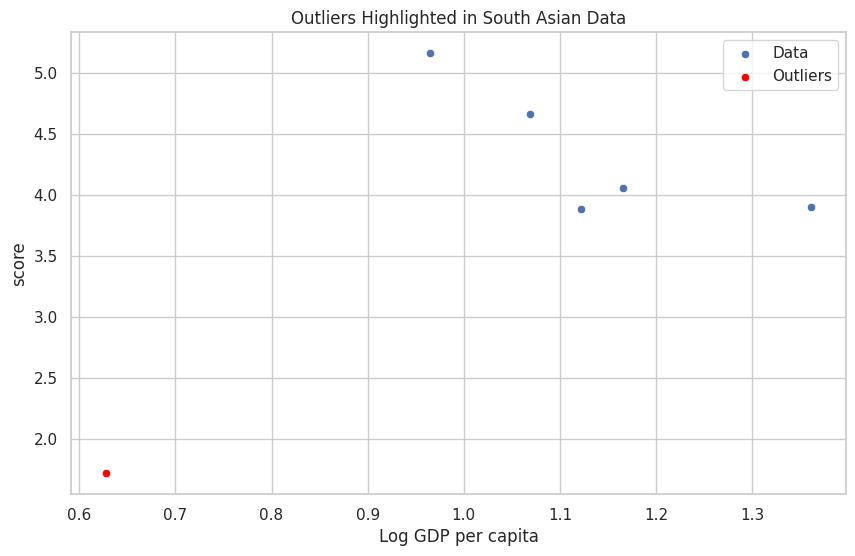

In [ ]:
# Plot these outliers and discuss their implications.

outliers = asian_df[(asian_df['Outlier_gdp'] == True) |
                    (asian_df['Outlier_score'] == True)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=asian_df, x='Log GDP per capita', y='score', label='Data')
sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', color='red', label='Outliers')
plt.title('Outliers Highlighted in South Asian Data')
plt.legend()
plt.show()

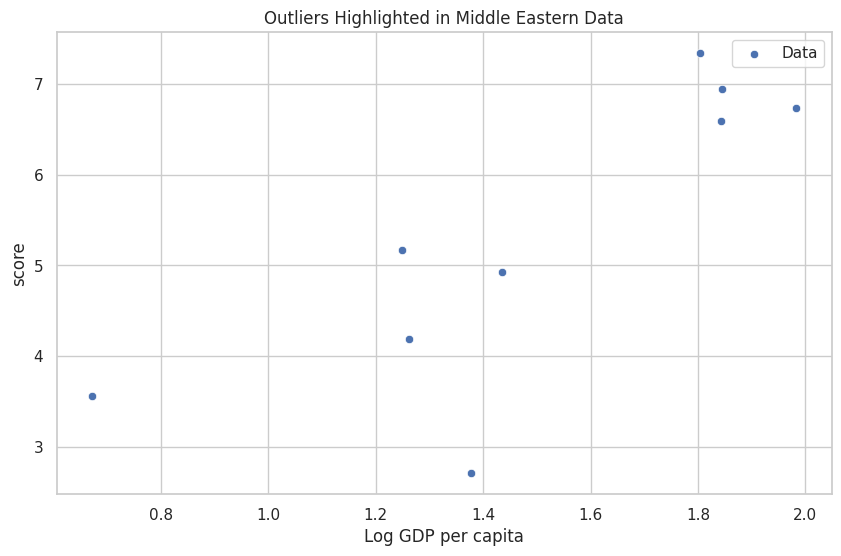

In [ ]:

# --- Outlier Detection for Middle East ---
# Calculate IQR for Middle East Score and GDP
q1_me_score = east_df['score'].quantile(0.25)
q3_me_score = east_df['score'].quantile(0.75)
IQR_me_score = q3_me_score - q1_me_score
lower_bound_me_score = q1_me_score - 1.5 * IQR_me_score
upper_bound_me_score = q3_me_score + 1.5 * IQR_me_score

q1_me_gdp = east_df['Log GDP per capita'].quantile(0.25)
q3_me_gdp = east_df['Log GDP per capita'].quantile(0.75)
IQR_me_gdp = q3_me_gdp - q1_me_gdp
lower_bound_me_gdp = q1_me_gdp - 1.5 * IQR_me_gdp
upper_bound_me_gdp = q3_me_gdp + 1.5 * IQR_me_gdp

# Identify outliers for GDP and Score in Middle East
east_df['Outlier_GDP'] = (east_df['Log GDP per capita'] < lower_bound_me_gdp) | (east_df['Log GDP per capita'] > upper_bound_me_gdp)
east_df['Outlier_Score'] = (east_df['score'] < lower_bound_me_score) | (east_df['score'] > upper_bound_me_score)

# Extract outliers for Middle East
outliers_me = east_df[(east_df['Outlier_GDP'] == True) | (east_df['Outlier_Score'] == True)]

# Plot outliers in Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(data=east_df, x='Log GDP per capita', y='score', label='Data')
sns.scatterplot(data=outliers_me, x='Log GDP per capita', y='score', color='red', label='Outliers')
plt.title('Outliers Highlighted in Middle Eastern Data')
plt.legend()
plt.show()

### 7. Visualization:

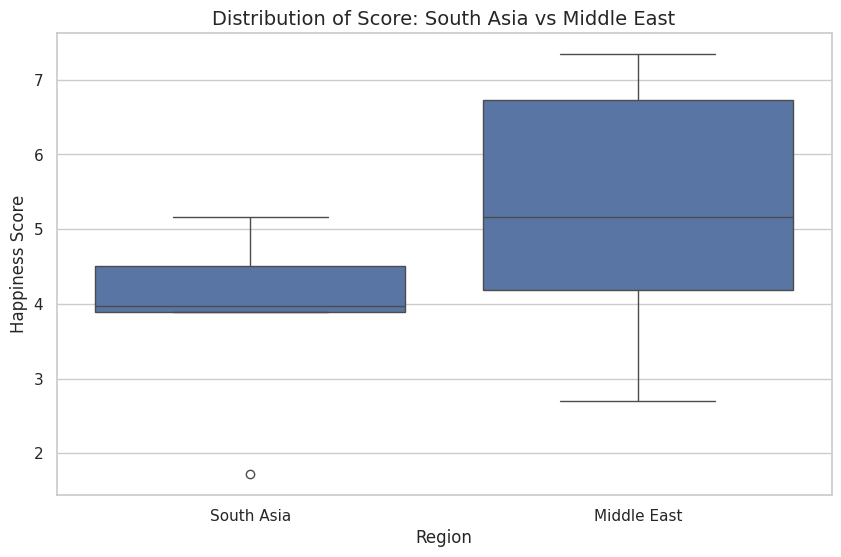

In [ ]:
# Create boxplots comparing the distribution of Score between South Asia and the Middle East.

# Add 'Region' column to both dataframes
asian_df['Region'] = 'South Asia'
east_df['Region'] = 'Middle East'

# Combine the two DataFrames
combined_df = pd.concat([asian_df, east_df])

# Create boxplot comparing the distribution of Score between South Asia and the Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Distribution of Score: South Asia vs Middle East', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.show()